# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Adriati Manuk Allo
- **Email:** adriatimank75@gmail.com
- **ID Dicoding:** tiaadri15

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata penyewaan sepeda tiap jam?
- Berapa persentase pengguna yang memilih menggunakan sepeda sewaan saat hari kerja?
- Berapa persentase penyewaan sepeda pada dari tahun 2011-2012?
- Bagaimana perbandingan antara casual user dengan registered users?
- Bagaimana pengaruh musim terhadap penyewaan sepeda per tahunnya?

## Import Semua Packages/Library yang Digunakan

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

## Data Wrangling

### Gathering Data

#### Memuat tabel day

Method head() digunakan untuk menampilkan 5 record teratas dari data day.csv

In [152]:
df_day = pd.read_csv('data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat tabel hour

Method head() digunakan untuk menampilkan 5 record teratas dari data hour.csv

In [153]:
df_hour = pd.read_csv('data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai data df_day
Data pertama yang dinilai adalah df_day yang akan diperiksa tipe data dari tiap kolomnya menggunakan method info() dan method isna() yang dipadukan dengan sum() untuk memeriksa serta menghitung apakah ada nilai yang hilang atau tidak  serta memeriksa parameter statistik dari setiap kolom yang ada

In [154]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [155]:

df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Memeriksa jumlah nilai duplikat

In [156]:
print (f"Jumlah data duplikat pada df_day: {df_day.duplicated().sum()}")

Jumlah data duplikat pada df_day: 0


#### Memeriksa parameter statistik dari kolom numerik

Method describe() akan menampilkan ringaksan parameter statistik (mean, standar deviasi, nilai minimal, nilai maksimal, dsb)

In [157]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

- Pada data df_day, jumlah data pada setiap kolom adalah sama yaitu 731 record yang menunjukkan tidak adanya data yang nilainya hilang (missing value). Selain itu tidak di temukan juga data duplikat pada setiap record yang ada. Namun, pada saat memeriksa tipe data setiap kolom didapatkan bahwa kolom dteday memiliki tipe data object yang seharusnya tipe datanya adalah datetime agar sesuai dengan nilai yang di simpan yaitu tanggal.

#### Menilai data df_hour
Data kedua yang dinilai adalah df_hour yang akan diperiksa tipe data dari tiap kolomnya menggunakan method info() dan method isna() yang dipadukan dengan sum() untuk memeriksa serta menghitung apakah ada nilai yang hilang atau tidak serta memeriksa parameter statistik dari setiap kolom yang ada

#### Memeriksa tipe data tiap kolom dan missing value

In [158]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [159]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Memeriksa jumlah nilai duplikat

In [160]:
print (f"Jumlah data duplikat pada df_hour: {df_hour.duplicated().sum()}")

Jumlah data duplikat pada df_hour: 0


#### Memeriksa parameter statistik dari kolom numerik
Method describe() akan menampilkan ringaksan parameter statistik (mean, standar deviasi, nilai minimal, nilai maksimal, dsb)

In [161]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

- Pada data df_hour, jumlah data pada setiap kolom adalah sama yaitu 17379 record yang menunjukkan tidak adanya data yang nilainya hilang (missing value). Selain itu tidak di temukan juga data duplikat pada setiap record yang ada. Namun, pada saat memeriksa tipe data setiap kolom didapatkan bahwa kolom dteday memiliki tipe data object yang seharusnya tipe datanya adalah datetime agar sesuai dengan nilai yang di simpan yaitu tanggal.

### Cleaning Data

#### Menghapus kolom insight pada df_day dan df_hour
Penghapusan ini dilakukan karena kolom insight berisi record index, yang mana tidak diperlukan selama proses analisis data

In [162]:
df_day.drop(columns=["instant"], inplace=True)

In [163]:
df_hour.drop(columns=["instant"], inplace=True)

#### Mengubah tipe data object kolom dteday menjadi datetime

In [164]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


**Insight:**
- Method to_datetime digunakan untuk mengubah tipe data dari kolom dteday yang sebelumnya object mejadi datetime. Setelah dilakukan perubahakan, digunakan method info() untuk memeriksa apakah kolom dtype sudah berubah tipe datanya. Sehingga dapat dilihat pada skrip diatas, tipe data kolom berhasil diubah.

#### Mengubah nilai didalam kolom yr, workingday, season, weathersit, mnth dalam df_day

In [165]:
# Mengubah nilai pada kolom yr dari 0 dan 1 menjadi 2011 dan 2012
df_day['yr'].replace({0: '2011', 1: '2012'}, inplace=True)

# Mengubah nilai pada kolom season dari 1, 2, 3, 4 menjadi springer, summer, fall, dan winter
df_day['season'].replace({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)

# Mengubah nilai pada kolom weathersit
df_day['weathersit'].replace({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
                      3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}, inplace=True)

# Mengubah nilai pada kolom mnth dari 1-12 menjadi Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec
df_day['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore Data df_day

In [166]:
df_day.describe()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

- Berdasarkan parameter statistik pada df_day dapat dilihat bahwa jumlah pengguna sebanyak 731.000000 selama satu tahun dengan rata-rata pengguna casual sebesar 848.176471 dan pengguna registered sebesar 3656.172367. Total penyewaan sepeda berdasarkan jumlah pengguna casual dan registered sebesar 8714.000000. Selain itu, pada untuk variabel temp, nilai 50% (median) adalah 0.498, yang dekat dengan nilai rata-rata, menunjukkan distribusi suhu yang simetris. Pada casual, 50% dari nilai berada di bawah 713 penyewa, sedangkan 75% berada di bawah 1096, menunjukkan bahwa lebih dari separuh hari memiliki jumlah penyewa kasual yang lebih rendah dari nilai tersebut, namun masih terdapat hari-hari dengan penyewa jauh lebih tinggi.

#### Menghitung persentase pengguna yang memilih menggunakan sepeda sewaan saat hari kerja

In [167]:
df_day["workingday"].unique()

array([0, 1], dtype=int64)

In [168]:
# Filter untuk hari kerja saja
df_workingday = df_day[df_day['workingday'] == 1]
total_users_workingday = df_workingday['cnt'].sum()

# Hitung total penyewaan untuk semua hari
total_users_all = df_day['cnt'].sum()

# Hitung persentase pengguna yang memilih sepeda sewaan saat hari kerja
percentage_workingday = (total_users_workingday / total_users_all) * 100

# Membuat tabel menggunakan PrettyTable
users_table = PrettyTable()
users_table.field_names = ["Hari Kerja", "Jumlah Penyewaan", "Persentase (%)"]

# Menambahkan baris untuk kategori hari kerja
users_table.add_row(["Hari Kerja (1)", total_users_workingday, round(percentage_workingday, 2)])

# Menampilkan tabel
print(users_table)

+----------------+------------------+----------------+
|   Hari Kerja   | Jumlah Penyewaan | Persentase (%) |
+----------------+------------------+----------------+
| Hari Kerja (1) |     2292410      |     69.62      |
+----------------+------------------+----------------+


**Insight:**
- Penggunaan sepeda sewa pada hari kerja sebanyak 2.292.410 dengan persentase 69.62% yang menunjukkan adanya kecenderungan kuat untuk menjadikan sepeda sebagai transportasi utama untuk bekerja. Hal ini dapat berdampak baik bagi kesehatan maupun lingkungan serta mengurangi kepadatan lalu lintas

#### Pengaruh musim terhadap penyewaan sepeda per tahunnya

In [169]:
# Buat kolom 'season' dan 'year'
df_day['season'] = df_day['dteday'].dt.month.apply(get_season)
df_day['year'] = df_day['dteday'].dt.year

# Hitung jumlah penyewaan terbanyak (maksimal) berdasarkan musim per tahun
max_rental_by_season_year = df_day.groupby(['year', 'season']).cnt.sum().sort_values(ascending=False).reset_index().head(10)

# Membuat PrettyTable untuk menampilkan hasil
table = PrettyTable()

# Menambahkan header tabel
table.field_names = ["Year", "Season", "Total Rentals"]

# Menambahkan data ke tabel dari hasil maksimal penyewaan per musim per tahun
for _, row in max_rental_by_season_year.iterrows():
    table.add_row([row['year'], row['season'], row['cnt']])

# Print tabel
print(table)

+------+--------+---------------+
| Year | Season | Total Rentals |
+------+--------+---------------+
| 2012 | Summer |     620940    |
| 2012 |  Fall  |     570078    |
| 2012 | Spring |     534964    |
| 2011 | Summer |     421544    |
| 2011 |  Fall  |     353096    |
| 2012 | Winter |     323594    |
| 2011 | Spring |     294736    |
| 2011 | Winter |     173727    |
+------+--------+---------------+


**Insight:**

- Berdasarkan tabel diatas, musim panas (Summer) di tahun 2012 menunjukkan penyewaan sepeda tertinggi dengan 620.940 total penyewaan. Ini menandakan bahwa musim panas memberikan kondisi cuaca yang optimal untuk aktivitas luar ruangan seperti bersepeda. Faktor cuaca seperti suhu hangat, lebih banyak hari cerah, dan ketersediaan waktu liburan (bagi pelajar atau pekerja) mungkin berkontribusi pada tingginya angka penyewaan ini.

### Explore Data df_hour

In [170]:
df_hour.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

- Berdasarkan tabel pivot diatas, setiap variabel memiliki 17,379 record, menunjukkan bahwa tidak ada nilai yang hilang dalam dataset ini. Rata-rata jumlah pengguna casual adalah 49.305030 sedangkan pengguna registered adalah 151.357286. Selain itu, rata-rata untuk season adalah 2.49, yang menunjukkan bahwa distribusi data cenderung berada di tengah-tengah musim 1 sampai 4.

#### Menghitung nilai rata-rata penyewaan sepeda per jam

In [171]:
# Menghitung rata-rata penyewaan sepeda per jam
average_hourly_rentals = df_hour.groupby('hr')['cnt'].mean().round(2)

# Membuat tabel dengan PrettyTable
table = PrettyTable()
table.field_names = ["Jam", "Rata-rata Penyewaan"]

# Menambahkan data ke tabel
for hour, avg in average_hourly_rentals.items():
    table.add_row([hour, avg])

# Menampilkan tabel
print(table)

+-----+---------------------+
| Jam | Rata-rata Penyewaan |
+-----+---------------------+
|  0  |         53.9        |
|  1  |        33.38        |
|  2  |        22.87        |
|  3  |        11.73        |
|  4  |         6.35        |
|  5  |        19.89        |
|  6  |        76.04        |
|  7  |        212.06       |
|  8  |        359.01       |
|  9  |        219.31       |
|  10 |        173.67       |
|  11 |        208.14       |
|  12 |        253.32       |
|  13 |        253.66       |
|  14 |        240.95       |
|  15 |        251.23       |
|  16 |        311.98       |
|  17 |        461.45       |
|  18 |        425.51       |
|  19 |        311.52       |
|  20 |        226.03       |
|  21 |        172.31       |
|  22 |        131.34       |
|  23 |        87.83        |
+-----+---------------------+


**Insight:**
- Berdasarkan tabel diatas dapat diambil kesimpulan bahwa terdapat angka yang tinggi pada jam-jam tertentu (misalnya antara jam 7 hingga 9 pagi dan 5 hingga 7 sore), ini menunjukkan bahwa banyak orang menggunakan sepeda untuk berangkat dan pulang kerja.

In [172]:
# Menghitung jumlah penyewaan untuk setiap tahun
rental_counts = df_day.groupby('yr')['cnt'].sum()

# Menghitung total penyewaan
total_rentals = rental_counts.sum()

# Menghitung persentase penyewaan untuk setiap tahun
percentage_rentals = (rental_counts / total_rentals) * 100

# Membuat tabel menggunakan PrettyTable
percentage_table = PrettyTable()
percentage_table.field_names = ["Year", "Total Rentals", "Percentage (%)"]

# Menambahkan baris untuk setiap tahun
for year, count in rental_counts.items():
    percentage_table.add_row([year, count, round(percentage_rentals[year], 2)])

# Menampilkan tabel
print(percentage_table)

+------+---------------+----------------+
| Year | Total Rentals | Percentage (%) |
+------+---------------+----------------+
| 2011 |    1243103    |     37.75      |
| 2012 |    2049576    |     62.25      |
+------+---------------+----------------+


**Insight:**
- Dari tabel diatas dapat ditarik kesimpulan bahwa penyewaan sepeda mengalami pertumbuhan yang signifikan dari tahun 2011 ke tahun 2012. Dimana pada tahun 2012 persentasenya menjadi 62.25% dari 37.75% dengan total penyewaan 2.049.576 penyewa. 

In [173]:
# Menghitung total user di kolom casual dan registered pada data hour
total_casual = df_hour["casual"].sum()
total_registered = df_hour["registered"].sum()

# Membuat tabel menggunakan PrettyTable
comparison_table = PrettyTable()
comparison_table.field_names = ["User Type", "Total Users"]

# Menambahkan baris untuk pengguna kasual dan terdaftar
comparison_table.add_row(["Casual", total_casual])
comparison_table.add_row(["Registered", total_registered])

# Menampilkan tabel
print(comparison_table)


+------------+-------------+
| User Type  | Total Users |
+------------+-------------+
|   Casual   |    620017   |
| Registered |   2672662   |
+------------+-------------+


**Insight:**
- Dari tabel diatas dapat dilihat bahwa penyewa sepeda didominasi oleh registered user sebanyak 2.672.666 orang. Hal ini menunjukkan pelayanan yang diberikan oleh perusahaan berhasil menarik pengguna tetap yang menggunakan sepeda sebagai transportasi sehari-hari

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Berapa rata-rata penyewaan sepeda tiap jam?

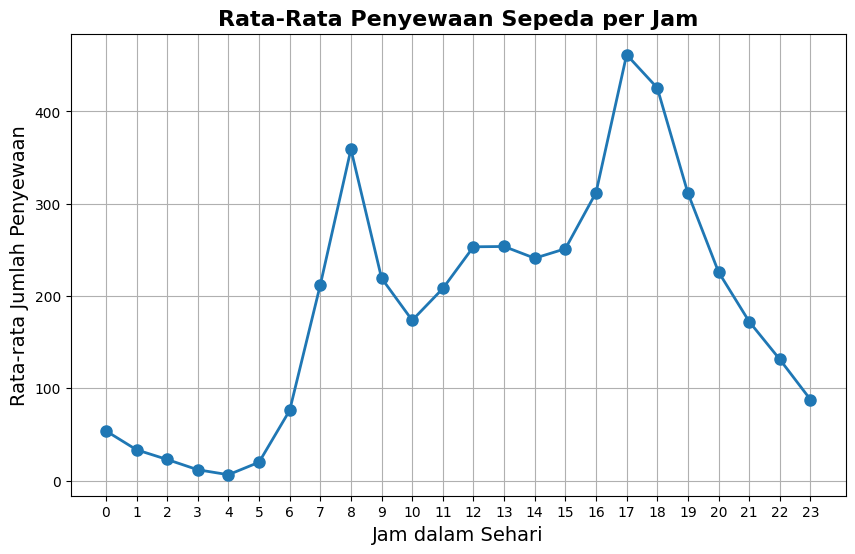

In [174]:
# Menghitung rata-rata penyewaan tiap jam
average_hourly_rentals = df_hour.groupby('hr')['cnt'].mean().round(2)

# Visualisasi dengan Line Chart
plt.figure(figsize=(10,6))
plt.plot(average_hourly_rentals.index, average_hourly_rentals.values, 
         marker='o', color='#1f77b4', markersize=8, linestyle='-', linewidth=2)
plt.title('Rata-Rata Penyewaan Sepeda per Jam', fontsize=16, fontweight='bold')
plt.xlabel('Jam dalam Sehari', fontsize=14)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=14)
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Dari line chart diatas dapat diambil kesimpulan bahwa rata-rata jam penyewaan terbanyak adalah pulu 17.00-18.00 dan rata-rata terendah ada pada jam 04.00 

### Pertanyaan 2:

#### Berapa persentase pengguna yang memilih menggunakan sepeda sewaan saat hari kerja?

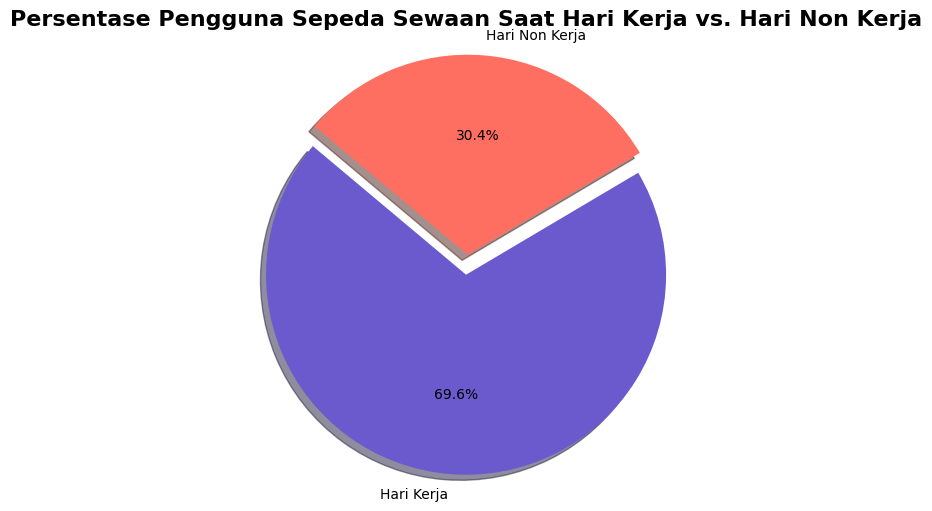

In [175]:
# Filter untuk hari kerja saja
df_workingday = df_day[df_day['workingday'] == 1]
total_users_workingday = df_workingday['cnt'].sum()

# Hitung total penyewaan untuk semua hari
total_users_all = df_day['cnt'].sum()

# Hitung persentase pengguna yang memilih sepeda sewaan saat hari kerja
percentage_workingday = (total_users_workingday / total_users_all) * 100
percentage_non_workingday = 100 - percentage_workingday

# Data untuk pie chart
labels = ['Hari Kerja', 'Hari Non Kerja']
sizes = [percentage_workingday, percentage_non_workingday]
colors = ['#6A5ACD', '#FF6F61']  # Warna untuk pie chart
explode = (0.1, 0)  # Menggunakan efek explode pada slice hari kerja

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Persentase Pengguna Sepeda Sewaan Saat Hari Kerja vs. Hari Non Kerja', fontsize=16, fontweight='bold')

# Menampilkan chart
plt.axis('equal')
plt.show()

**Insight:**
- Berdasarkan pie chart diatas, persentase pengguna sepeda sewaan yang menggunakan sepeda pada hari kerja dibandingkan dengan hari non kerja sebesar 69.6%, 39.5% lebih banyak dibandingkan hari non kerja. Data yang digunakan dalam visualisasi ini diambil dari dataset penyewaan sepeda dan telah difilter untuk menunjukkan perbedaan jumlah penyewaan sepeda di antara kedua kategori tersebut.

### Pertanyaan :

#### Berapa persentase penyewaan sepeda pada dari tahun 2011-2012?

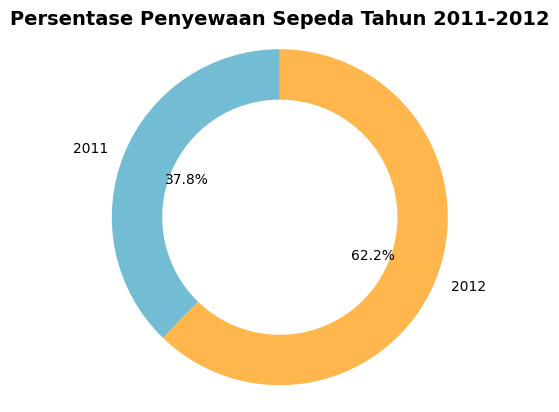

In [180]:
# Menghitung jumlah penyewaan untuk setiap tahun
rental_counts = df_day.groupby('yr')['cnt'].sum()

# Membuat donut pie chart
wedges, texts, autotexts = plt.pie(rental_counts, 
                                    autopct='%1.1f%%', 
                                    startangle=90, 
                                    colors=["#72BCD4", "#FFB74D"],
                                    wedgeprops=dict(width=0.3))  # Menambahkan lebar untuk donut

# Menambahkan label tahun
labels = ['2011', '2012']  # Label tahun
for i, text in enumerate(texts):
    text.set_text(labels[i])  # Mengatur teks label menjadi tahun

plt.title("Persentase Penyewaan Sepeda Tahun 2011-2012", fontsize=14, fontweight='bold')
plt.axis('equal')  # Menjaga agar pie chart berbentuk lingkaran
plt.show()

**Insight:**
- Berdasarkan pie chart diatas, persentase penyewaan sepeda pada tahun 2011 sebesar 37.8% sedangkan pada tahun 2021 sebesar 62.2%. Terdapat kenaikan penggunaan sepeda sewaan sebesar 24.4% dari tahun 2011 sampai 2012.

### Pertanyaan 4:

#### Bagaimana perbandingan antara casual user dengan registered users?

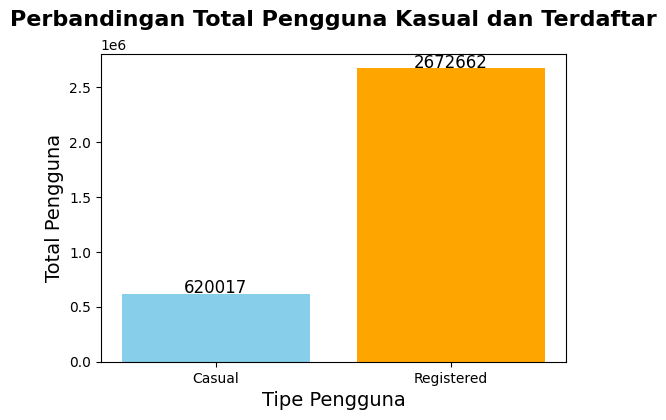

In [179]:
# Mengitung total user dikolom casual dan registered pada data hour
total_casual = df_hour["casual"].sum()
total_registered = df_hour["registered"].sum()

# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({
    'User Type': ['Casual', 'Registered'],
    'Total Users': [total_casual, total_registered]
})

# Membuat figure
plt.figure(figsize=(6, 4))

# Membuat grafik batang untuk perbandingan pengguna
plt.bar(comparison_df['User Type'], comparison_df['Total Users'], color=['skyblue', 'orange'])

# Memberi label pada grafik
plt.title('Perbandingan Total Pengguna Kasual dan Terdaftar', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipe Pengguna', fontsize=14)
plt.ylabel('Total Pengguna', fontsize=14)

# Menampilkan nilai di atas batang
for i, v in enumerate(comparison_df['Total Users']):
    plt.text(i, v + 0.001 * max(comparison_df['Total Users']), str(v), ha='center', fontsize=12)

plt.show()

**Insight:**
- Berdasarkan bar plot diatas total casual user sebesar 620017 sedangkan registered user sebesar 2672662.  Ini menunjukkan bahwa pengguna terdaftar (registered users) jauh lebih banyak dibandingkan pengguna kasual (casual users), dengan proporsi yang mencolok. Hal ini dapat diartikan bahwa banyak orang yang memilih untuk mendaftar dan menjadi pengguna tetap, yang kemungkinan mendapatkan manfaat tambahan seperti tarif yang lebih murah atau akses ke layanan eksklusif.

### Pertanyaan 5:

#### Bagaimana pengaruh musim terhadap penyewaan sepeda?

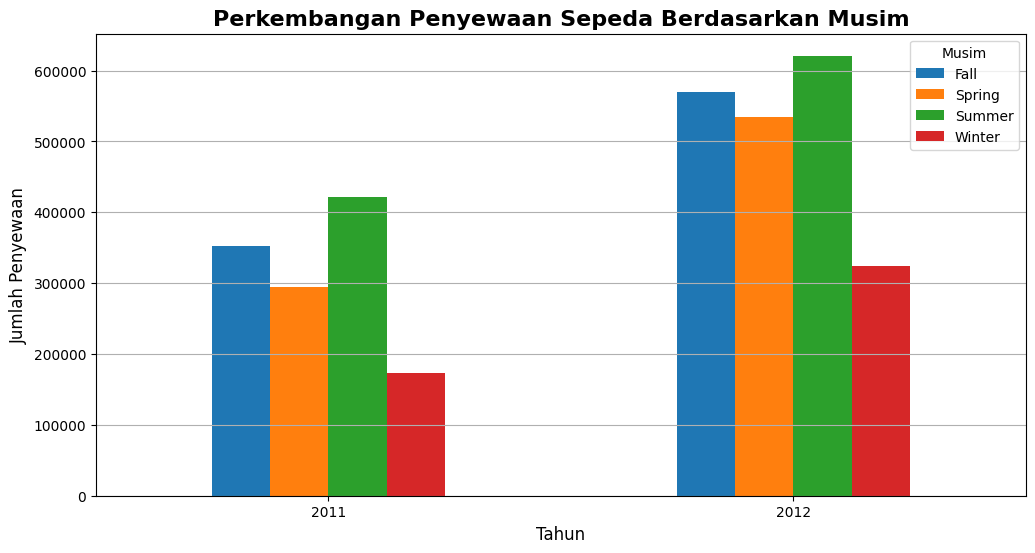

In [178]:
# Hitung jumlah penyewaan berdasarkan musim per tahun
seasonal_rentals = df_day.groupby(['year', 'season'])['cnt'].sum().unstack(fill_value=0)

# Visualisasi menggunakan bar plot
seasonal_rentals.plot(kind='bar', figsize=(12, 6))

# Menambahkan judul dan label
plt.title('Perkembangan Penyewaan Sepeda Berdasarkan Musim', fontsize=16, fontweight='bold')
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Musim')

# Menampilkan chart
plt.grid(axis='y')
plt.show()

**Insight:**
- Berdasarkan bar plot diatas, tahun 2012 merupakan tahun dengan penyewa terbanyak dengan minimum jumlah penyewa pada musim dingin sebesar 323.594 dan jumlah penyewa terbanyak pada musim panas sebesar 620.940. Hal ini menunjukkan kondisi musim sangat mempengaruhi jumlah penyewaan sepeda.

## Conclusion

- Terdapat puncak penggunaan sepeda sewaan pada jam sibuk, khususnya antara jam 7 hingga 9 pagi dan 5 hingga 7 sore. Hal ini menunjukkan bahwa sepeda sering digunakan sebagai moda transportasi oleh banyak orang untuk pergi dan pulang dari tempat kerja, menegaskan popularitas sepeda sebagai pilihan transportasi di jam-jam tersebut.
- Dengan 2.292.410 pengguna sepeda sewaan pada hari kerja, data ini mengindikasikan adanya kecenderungan yang kuat untuk menjadikan sepeda sebagai sarana transportasi utama. Hal ini tidak hanya berdampak positif bagi kesehatan individu, tetapi juga membantu mengurangi kemacetan lalu lintas dan meningkatkan kesadaran lingkungan.
- Persentase penyewaan sepeda mengalami peningkatan yang signifikan dari 37.8% pada tahun 2011 menjadi 62.2% pada tahun 2012, mencerminkan kenaikan sebesar 24.4%. Peningkatan ini menunjukkan bahwa semakin banyak orang beralih ke sepeda sewaan, memberikan peluang bagi pengelola untuk meningkatkan infrastruktur dan fasilitas bersepeda, serta memotivasi lebih banyak orang untuk menggunakan sepeda sebagai moda transportasi sehari-hari.
- Dengan total 620,017 casual user dan 2,672,662 registered users, jelas terlihat bahwa pengguna terdaftar memiliki jumlah yang jauh lebih besar dibandingkan pengguna kasual. Hal ini menunjukkan bahwa banyak orang lebih memilih untuk mendaftar sebagai pengguna tetap, yang mungkin mendapatkan manfaat lebih, seperti tarif yang lebih murah. Adanya basis pengguna yang loyal ini berpotensi meningkatkan pendapatan dan keberlanjutan program penyewaan sepeda, serta menunjukkan bahwa kebijakan dan infrastruktur mendukung penggunaan sepeda sebagai pilihan transportasi yang praktis dan efisien.
- Berdasarkan bar plot yang dianalisis, tahun 2012 mencatatkan penyewaan sepeda terbanyak, dengan 620.940 penyewa pada musim panas dan 323.594 penyewa pada musim dingin. Data ini menegaskan bahwa kondisi musim memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Tingginya jumlah penyewa pada musim panas menunjukkan bahwa cuaca yang lebih hangat dan nyaman sangat mendukung minat masyarakat untuk menggunakan sepeda sebagai moda transportasi. Sedangkan penurunan jumlah penyewa pada musim dingin mengindikasikan bahwa kondisi cuaca yang tidak menguntungkan mengurangi daya tarik penyewaan sepeda

## Menerapkan teknik analisis lanjutan

### RFM Analysis

RFM (Recency, Frequency, Monetary) adalah teknik analisis yang digunakan untuk mengevaluasi nilai pelanggan berdasarkan tiga faktor utama: 
1. Recency (seberapa baru pelanggan melakukan pembelian)
2. Frequency (seberapa sering pelanggan melakukan pembelian)
3. Monetary (jumlah uang yang dibelanjakan oleh pelanggan).

In [149]:
# Menggunakan tanggal terakhir dari df_day
current_date = df_day['dteday'].max()

# Menghitung RFM dengan fungsi sederhana
def calculate_rfm(df):
    return df.groupby('registered').agg(
        Recency=('dteday', lambda x: (current_date - x.max()).days),  # Recency
        Frequency=('cnt', 'count'),  # Frequency
        Monetary=('cnt', 'sum')  # Monetary (total penyewaan)
    ).reset_index()

# Menghitung RFM
rfm_df = calculate_rfm(df_day)

# Mengelompokkan pelanggan menjadi segmen yang lebih sederhana
def segment_customers(row):
    if row['Recency'] <= 30:
        return 'Recent Customers'
    elif row['Recency'] <= 60:
        return 'Medium Recency Customers'
    else:
        return 'Inactive Customers'

# Menambahkan kolom Segment
rfm_df['Segment'] = rfm_df.apply(segment_customers, axis=1)

# Menampilkan hasil segmen dengan PrettyTable
rfm_table = PrettyTable()
rfm_table.field_names = ["Registered", "Recency (Days)", "Frequency", "Monetary (Total Rentals)", "Segment"]

# Menambahkan 10 data pertama ke tabel
for index, row in rfm_df.head(10).iterrows():
    rfm_table.add_row([row['registered'], row['Recency'], row['Frequency'], row['Monetary'], row['Segment']])

# Print tabel
print(rfm_table)

+------------+----------------+-----------+--------------------------+--------------------+
| Registered | Recency (Days) | Frequency | Monetary (Total Rentals) |      Segment       |
+------------+----------------+-----------+--------------------------+--------------------+
|     20     |       63       |     1     |            22            | Inactive Customers |
|    416     |      704       |     1     |           431            | Inactive Customers |
|    432     |       5        |     1     |           441            |  Recent Customers  |
|    451     |      372       |     1     |           754            | Inactive Customers |
|    472     |      705       |     1     |           506            | Inactive Customers |
|    491     |      666       |     1     |           605            | Inactive Customers |
|    570     |      429       |     1     |           627            | Inactive Customers |
|    573     |       6        |     1     |           1013           |  Recent C

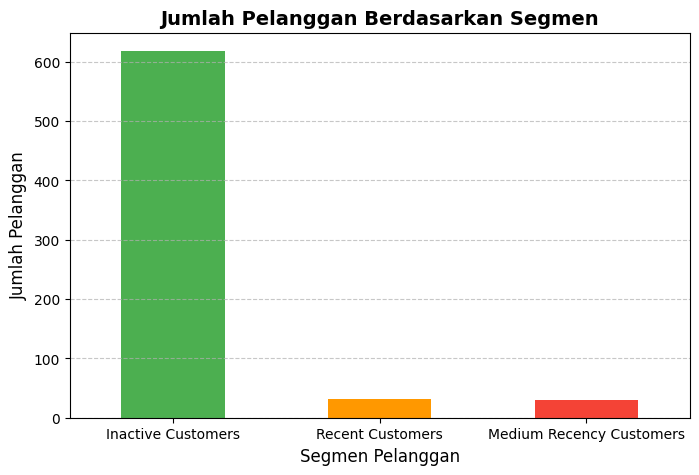

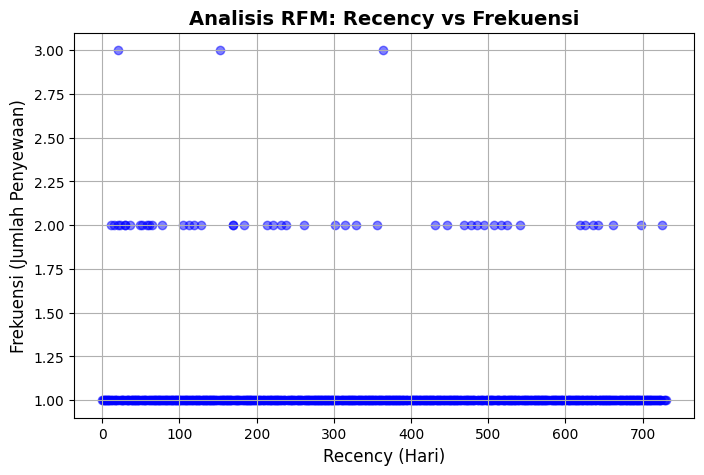

In [181]:
# Visualisasi Jumlah Pelanggan berdasarkan Segmen
plt.figure(figsize=(8, 5))
rfm_df['Segment'].value_counts().plot(kind='bar', color=['#4CAF50', '#FF9800', '#F44336'])
plt.title('Jumlah Pelanggan Berdasarkan Segmen', fontsize=14, fontweight='bold')
plt.xlabel('Segmen Pelanggan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi RFM menggunakan scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], c='blue', alpha=0.5)
plt.title('Analisis RFM: Recency vs Frekuensi', fontsize=14, fontweight='bold')
plt.xlabel('Recency (Hari)', fontsize=12)
plt.ylabel('Frekuensi (Jumlah Penyewaan)', fontsize=12)
plt.grid()
plt.show()

Berdasarkan hasil segemntasi didapatkan hasil antara lain sebagai berikut.

1. Pelanggan dikategorikan menjadi tiga segmen utama berdasarkan nilai Recency:
    - Pelanggan Baru (Recent Customers): Pelanggan yang melakukan penyewaan dalam 30 hari terakhir. Segmen ini menunjukkan pelanggan yang aktif dan   mungkin sangat potensial untuk dipertahankan serta diberikan promosi lebih lanjut.
    - Pelanggan Sedang (Medium Recency Customers): Pelanggan yang melakukan penyewaan antara 31 hingga 60 hari yang lalu. Pelanggan dalam segmen ini mungkin mulai kehilangan minat dan memerlukan strategi pemasaran untuk menarik perhatian mereka kembali.
    - Pelanggan Tidak Aktif (Inactive Customers): Pelanggan yang tidak melakukan penyewaan lebih dari 60 hari. Segmen ini memerlukan perhatian khusus karena mereka berpotensi hilang. Strategi re-engagement mungkin diperlukan untuk menarik mereka kembali.

2. Frekuensi penyewaan yang tinggi pada segmen pelanggan baru menunjukkan bahwa pelanggan yang baru saja melakukan penyewaan cenderung lebih aktif. Hal ini menunjukkan adanya peluang untuk menawarkan program loyalitas atau promosi untuk menjaga mereka tetap aktif.

3. Berdasarkan segmentasi ini, perusahaan dapat merancang strategi pemasaran yang lebih terfokus dan sesuai dengan setiap segmen. Misalnya, memberikan diskon atau penawaran khusus kepada pelanggan baru untuk mendorong penyewaan berulang, serta kampanye email untuk pelanggan yang tidak aktif untuk menarik mereka kembali.

## Export Dataset

Simpan dataset yang telah dibersihkan untuk digunakan pada streamlit

In [182]:
df_day.to_csv('dashboard/main_data.csv', index=False)